In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("btc-eth-prices.csv", index_col="Timestamp", parse_dates=True)

In [46]:
df.head(2)

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13


Text(0.5, 1.0, 'ETH VS BTC Price')

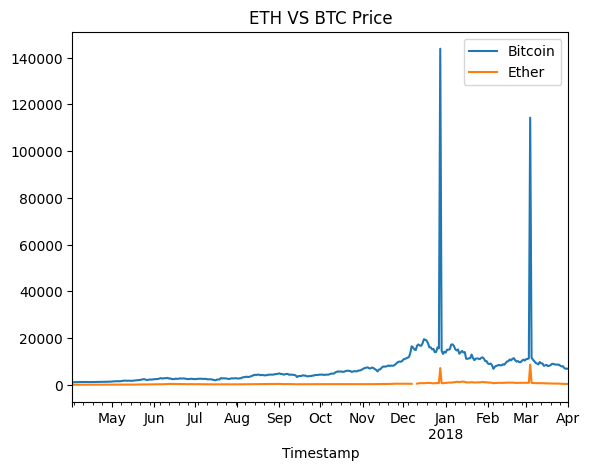

In [47]:
df.plot()
plt.title("ETH VS BTC Price")
#This plot is difficult to understand because the outliers are making the axis range to be bigger than the appropiate.
#For the sake of the interpretation of the graph, we consider the outliers invalid data.

(17501.0, 17531.0)

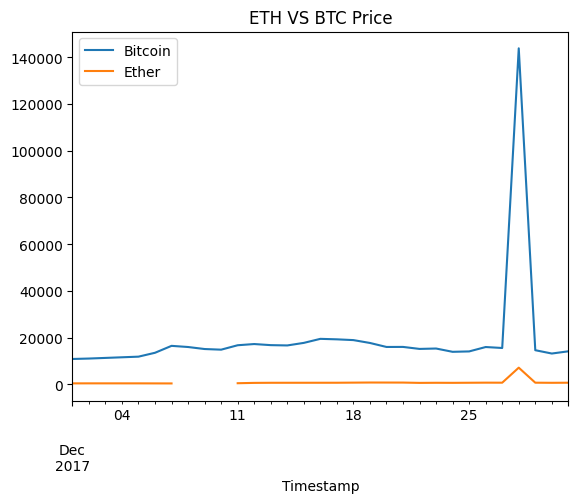

In [48]:
ax = df.plot()
plt.title("ETH VS BTC Price")
ax.set_xlim(["2017-12-01","2017-12-31"])
#Here you can see that there is missing data for the ETH

<AxesSubplot:xlabel='Timestamp'>

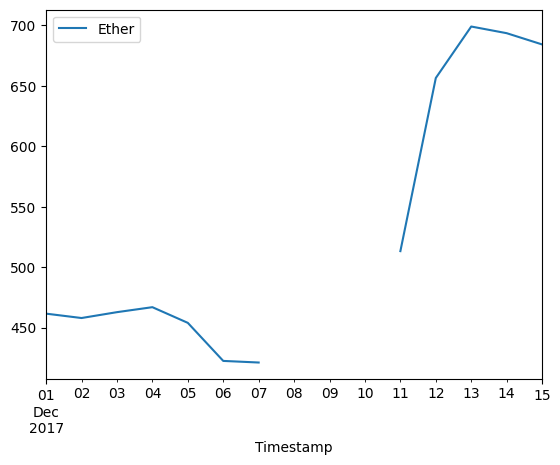

In [49]:
df.loc['2017-12': '2017-12-15'].plot(y="Ether") 
#A close up of the ETH missing data.

In [50]:
 df.loc['2017-12': '2017-12-15'] #Between the 7th and the 10th day of dececmber the data is NaN. 

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


In [51]:
df[df["Ether"].isnull()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


<AxesSubplot:xlabel='Timestamp'>

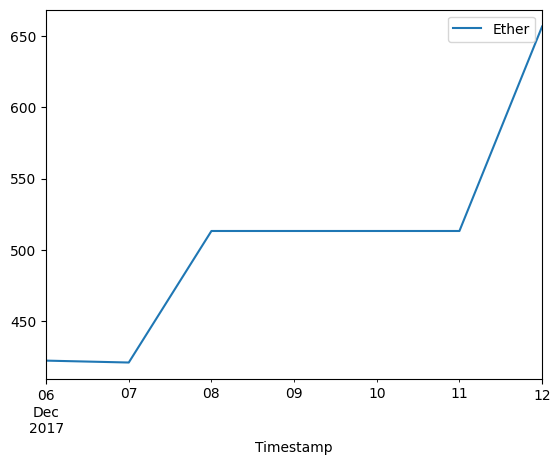

In [52]:
df.loc["2017-12-06":"2017-12-12"].fillna(method='bfill').plot(y="Ether") #How we are going to fill the NaN values.

In [53]:
df.fillna(method="bfill", inplace=True)

<AxesSubplot:xlabel='Timestamp'>

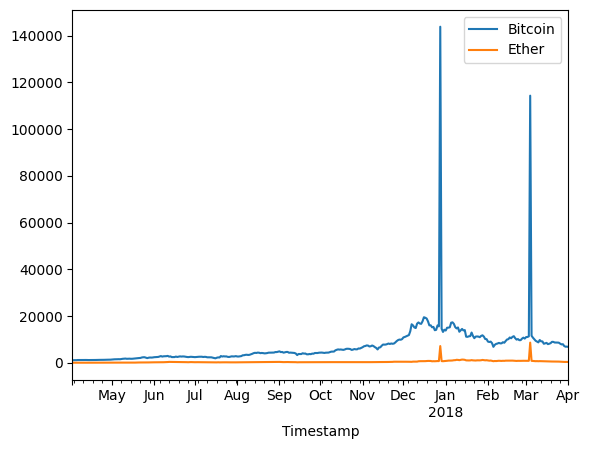

In [54]:
df.plot() #NO MORE MISSING DATA! :)

In [ ]:
df.drop(labels=["2017-12-28", "2018-03-04"], inplace=True) 
#Eliminating the outliers.

<AxesSubplot:xlabel='Timestamp'>

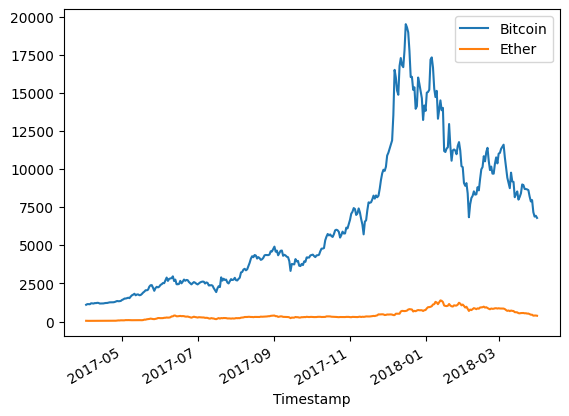

In [58]:
df.plot() #Graph without outliers.

<AxesSubplot:ylabel='Frequency'>

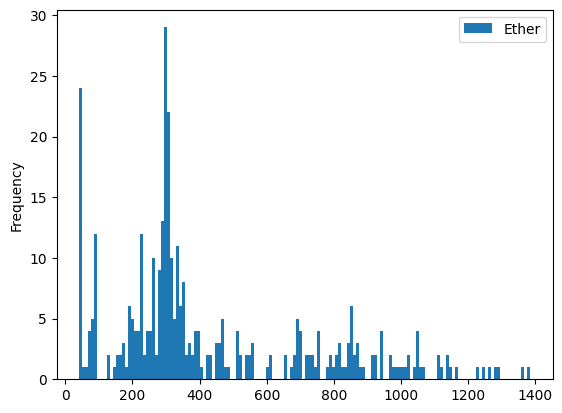

In [69]:
df.plot(kind="hist", y="Ether", bins=150)

### SEABORN

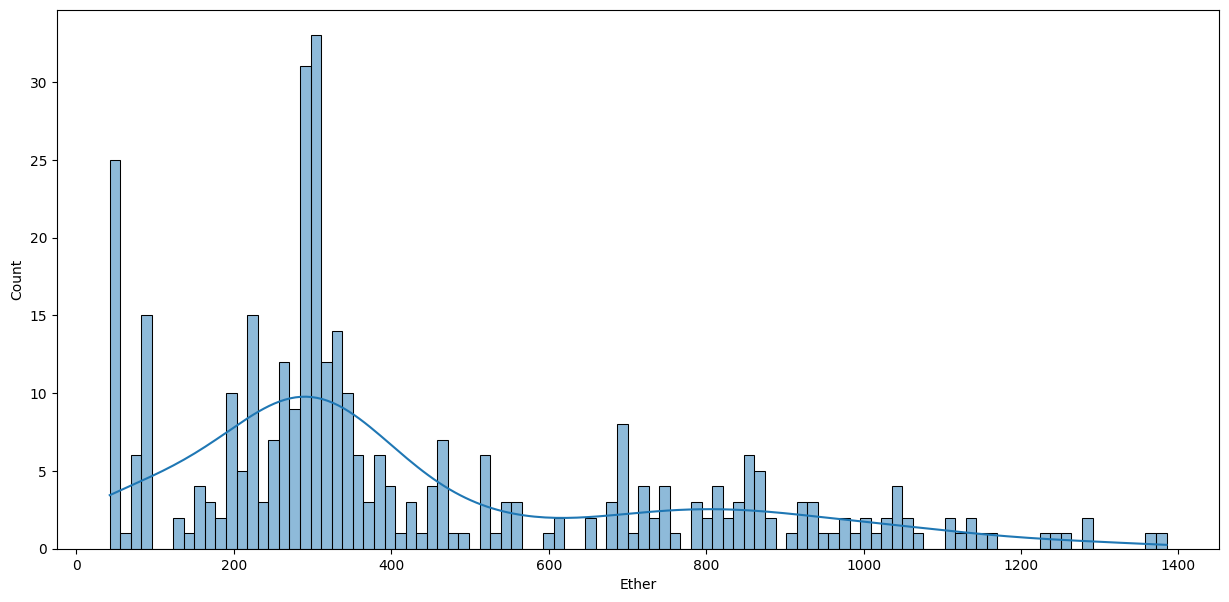

In [87]:
#We are going to use seaborn to improve the quality of the histogram and overlap a kde plot. 

fig, ax = plt.subplots(figsize=(15, 7)) 

sns.histplot(df['Ether'], bins=100, kde=True)
plt.show()

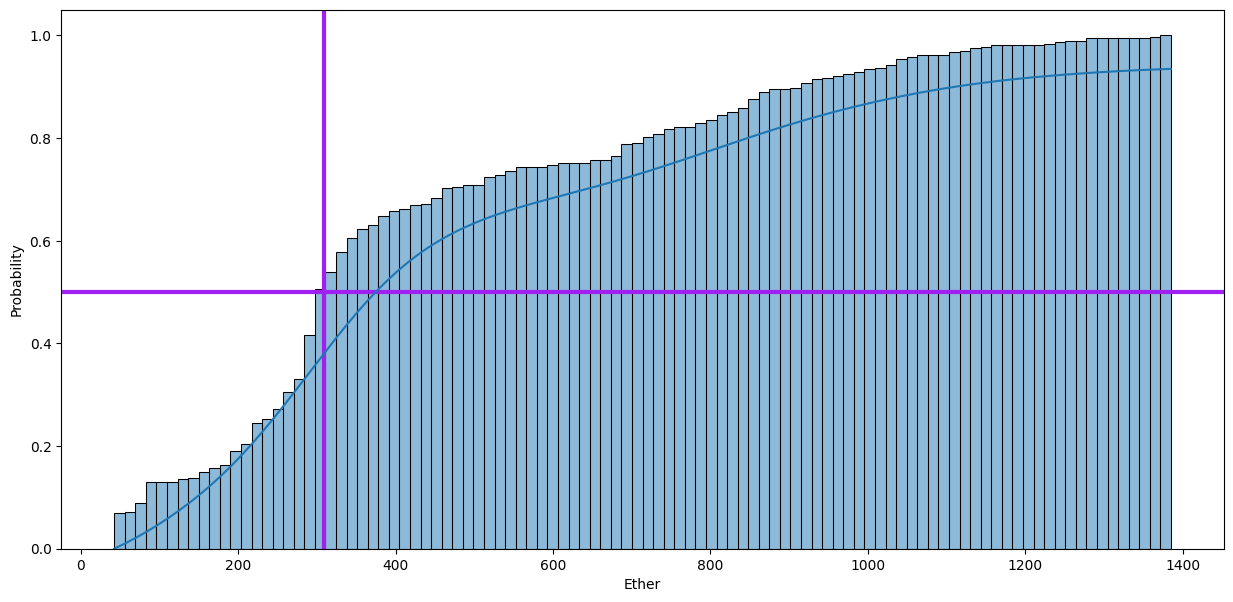

In [144]:
#Creating an acumulative histogram plot overlaped with a kde plot.
fig, axis = plt.subplots(figsize=(15,7))
#axis.set_title="Frecuencia Ether"
#axis.set_xlabel="Valor Ether"
axis.axhline(0.5, color='#A020F0', linewidth=3)
axis.axvline(df["Ether"].quantile(0.5), color='#A020F0', linewidth=3)


sns.histplot(df['Ether'], bins=100, kde=True, cumulative=True, stat="probability", ax=axis) 

plt.show()

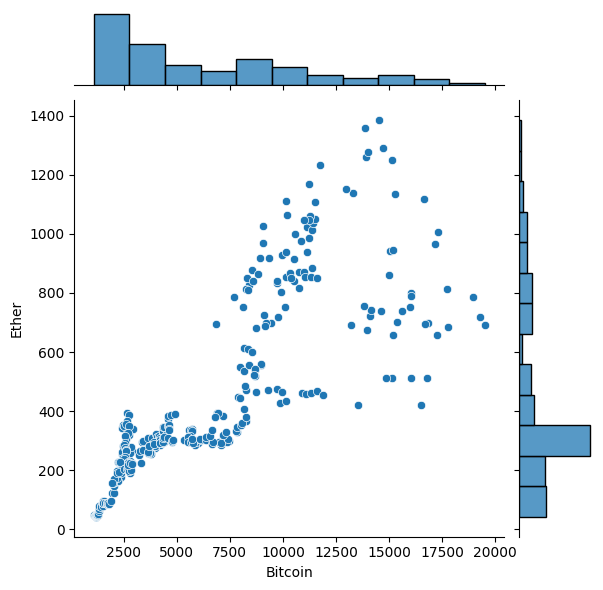

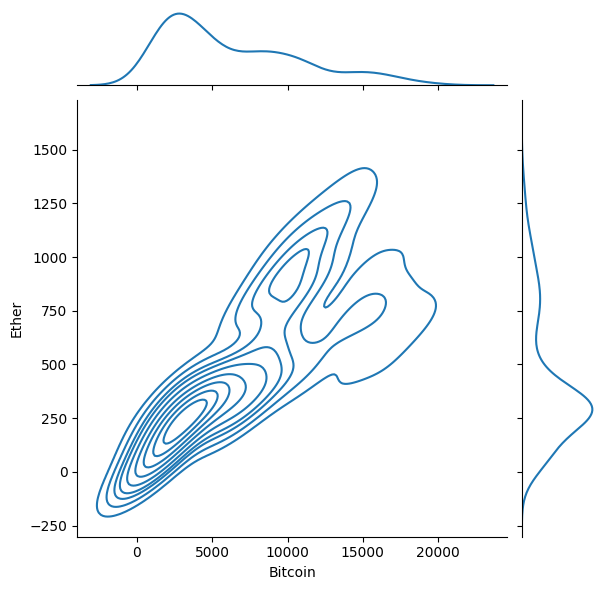

In [109]:
#Creating a scatter plot to see the correlation between the Bitcoin and Ether prices through the years.
sns.jointplot(x="Bitcoin", y="Ether", data=df)
sns.jointplot(x="Bitcoin", y="Ether", data=df, kind="kde")

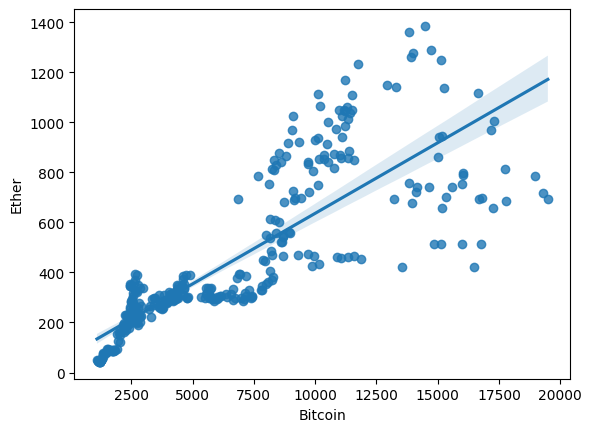

In [107]:
#Creating a linear regression with a scatter plot.
sns.regplot(x="Bitcoin", y="Ether", data=df)
plt.show()

In [112]:
#QUANTILES
df["Bitcoin"].quantile(0.22) #This show the cumulative value up to the 22% of bitcoin value.

2498.9727502857145

### Cleaning outliers statistically.

In [155]:
df_dirty = pd.read_csv("btc-eth-prices.csv", index_col="Timestamp", parse_dates=True)

In [160]:
btc_dirty_range = df_dirty['Bitcoin'].max() - df_dirty['Bitcoin'].min() 
#We calculate the range with the difference between max and min, the range is sensible to outliers.
btc_clean_range = df['Bitcoin'].max() - df['Bitcoin'].min()

In [161]:
btc_dirty_range, btc_clean_range

(142706.6475416667, 18399.51420833333)

In [157]:
df_dirty['Bitcoin'].var(), df_dirty['Bitcoin'].std()

(103766537.75278121, 10186.586167739475)

In [163]:
intercuartil = df_dirty['Bitcoin'].quantile(.75) - df_dirty['Bitcoin'].quantile(.25) 
#We use the intercuantil range as a dispersion measure because the sdt deviation is biased by the outliers.

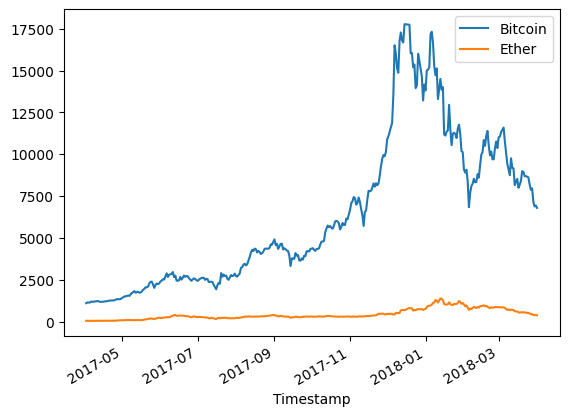

In [169]:
df[(df['Bitcoin'] > df['Bitcoin'].median() - (intercuartil*2)) & (df['Bitcoin'] < df['Bitcoin'].median() + (intercuartil*2))].plot()
#We clean the graph by using the median as a measure of central tendency and the interquartil range as a dispersion measure.
plt.show()